# Best Position vs Crossing ANOVA

Here, I will analyse the crossing by best position. In order to perform ANOVA, there are three assumptions that need to be fulfilled, namely, normality, homegeneity of variance, and independence. Independence is satisfied intuitively.

In [1]:
library("repr")
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
players = read.csv("MH3511_project/fifa23_players_data.csv")
head(players)

Known.As,Full.Name,Overall,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,Age,...,LM.Rating,CM.Rating,RM.Rating,LWB.Rating,CDM.Rating,RWB.Rating,LB.Rating,CB.Rating,RB.Rating,GK.Rating
L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
K. MbappÃ©,Kylian MbappÃ©,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25


In [3]:
colnames(players)

[1] "Known.As"                    "Full.Name"                  
 [3] "Overall"                     "Potential"                  
 [5] "Value.in.Euro."              "Positions.Played"           
 [7] "Best.Position"               "Nationality"                
 [9] "Image.Link"                  "Age"                        
[11] "Height.in.cm."               "Weight.in.kg."              
[13] "TotalStats"                  "BaseStats"                  
[15] "Club.Name"                   "Wage.in.Euro."              
[17] "Release.Clause"              "Club.Position"              
[19] "Contract.Until"              "Club.Jersey.Number"         
[21] "Joined.On"                   "On.Loan"                    
[23] "Preferred.Foot"              "Weak.Foot.Rating"           
[25] "Skill.Moves"                 "International.Reputation"   
[27] "National.Team.Name"          "National.Team.Image.Link"   
[29] "National.Team.Position"      "National.Team.Jersey.Number"
[31] "Attacking.Work.Rate"         "Defensive.Work.Rate"        
[33] "Pace.Total"                  "Shooting.Total"             
[35] "Passing.Total"               "Dribbling.Total"            
[37] "Defending.Total"             "Physicality.Total"          
[39] "Crossing"                    "Finishing"                  
[41] "Heading.Accuracy"            "Short.Passing"              
[43] "Volleys"                     "Dribbling"                  
[45] "Curve"                       "Freekick.Accuracy"          
[47] "LongPassing"                 "BallControl"                
[49] "Acceleration"                "Sprint.Speed"               
[51] "Agility"                     "Reactions"                  
[53] "Balance"                     "Shot.Power"                 
[55] "Jumping"                     "Stamina"                    
[57] "Strength"                    "Long.Shots"                 
[59] "Aggression"                  "Interceptions"              
[61] "Positioning"                 "Vision"                     
[63] "Penalties"                   "Composure"                  
[65] "Marking"                     "Standing.Tackle"            
[67] "Sliding.Tackle"              "Goalkeeper.Diving"          
[69] "Goalkeeper.Handling"         "GoalkeeperKicking"          
[71] "Goalkeeper.Positioning"      "Goalkeeper.Reflexes"        
[73] "ST.Rating"                   "LW.Rating"                  
[75] "LF.Rating"                   "CF.Rating"                  
[77] "RF.Rating"                   "RW.Rating"                  
[79] "CAM.Rating"                  "LM.Rating"                  
[81] "CM.Rating"                   "RM.Rating"                  
[83] "LWB.Rating"                  "CDM.Rating"                 
[85] "RWB.Rating"                  "LB.Rating"                  
[87] "CB.Rating"                   "RB.Rating"                  
[89] "GK.Rating"

## Crossing By Best Position

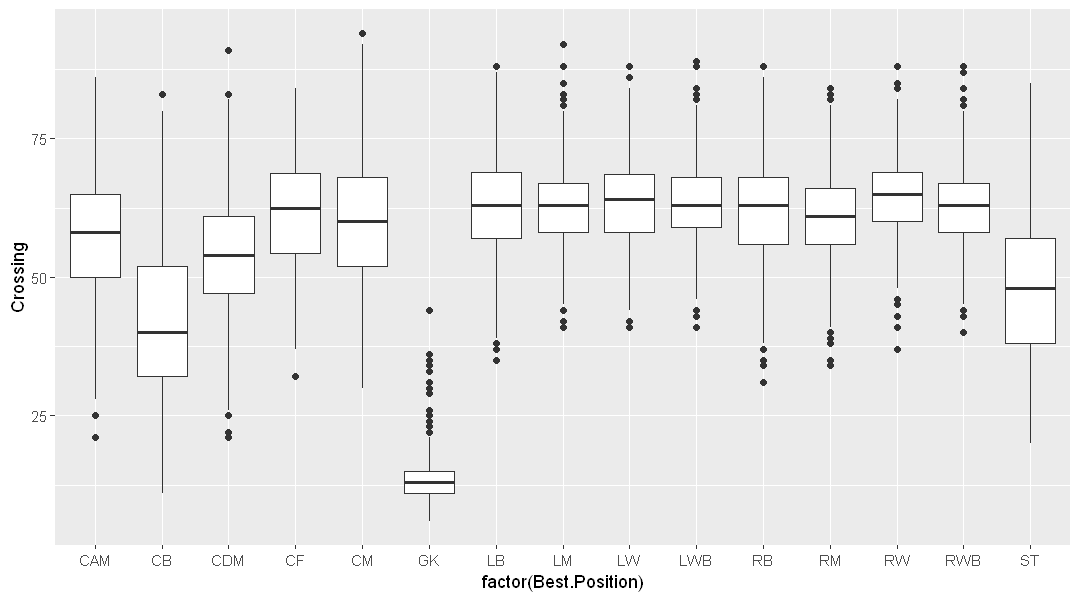

In [4]:
options(repr.plot.width=9, repr.plot.height=5)
df = players[,c('Best.Position', 'Crossing')]
ggplot(df,  aes(x=factor(Best.Position), y=Crossing)) + geom_boxplot() 

### All Left and Right Positions

In [5]:
group <- c('LM', 'RM', 'LB', 'RB', 'LWB', 'RWB', 'LW', 'RW')
df2 = players[(players['Best.Position'] == 'LM') |
              (players['Best.Position'] == 'RM') |
              (players['Best.Position'] == 'LB') |
              (players['Best.Position'] == 'RB') |
              (players['Best.Position'] == 'LWB') |
              (players['Best.Position'] == 'RWB') |
              (players['Best.Position'] == 'LW') |
              (players['Best.Position'] == 'RW'),
              c('Best.Position', 'Crossing')]
df2 = droplevels(df2) # To change to new levels
head(df2)

,Best.Position,Crossing
6,RW,80
12,LW,84
13,LW,83
16,LM,78
25,LB,88
40,LB,88


### Normality Assumption Check

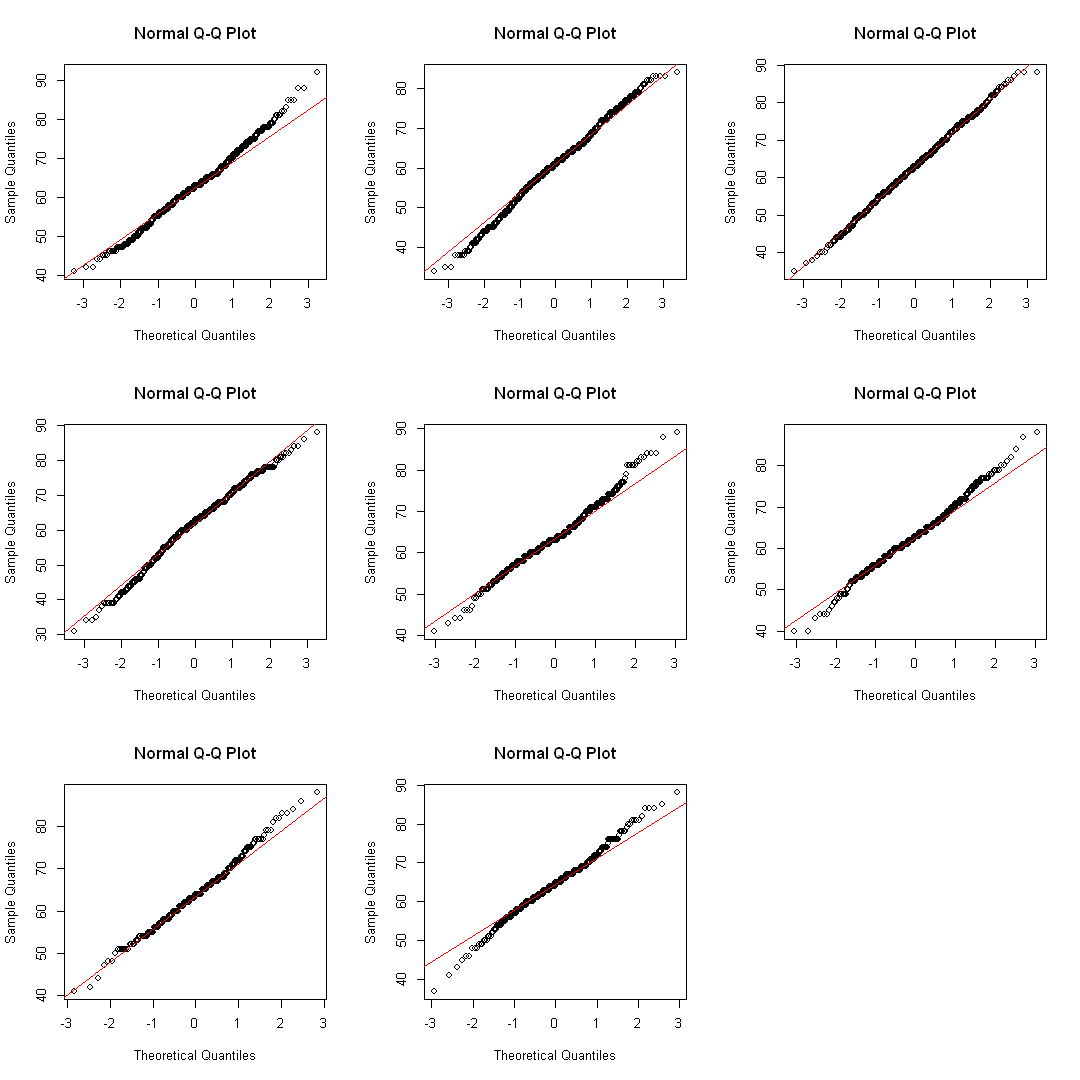

In [6]:
options(repr.plot.width=9, repr.plot.height=9)
par(mfrow=c(3,3))
for (pos in group){
    qqnorm(df2[df2['Best.Position'] == pos, 'Crossing'])
    qqline(df2[df2['Best.Position'] == pos, 'Crossing'], col='red')
}

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, not all Q-Q plot are in a straight-line. Let's do Shapiro-Wilk test to get more conclusive evidence.

In [7]:
pvalue = vector()
length = vector()
for (pos in group){
    x = df2[df2['Best.Position'] == pos, 'Crossing']
    pvalue = append(pvalue, round(shapiro.test(x)[[2]], 3))
    length = append(length, length(x))
}
normaldf = data.frame(group, length, pvalue)
normaldf[normaldf['pvalue'] <= 0.05,]

,group,length,pvalue
1,LM,797,0.001
2,RM,1443,0.000
4,RB,925,0.000
5,LWB,404,0.001
6,RWB,422,0.030


At 5% significance level, LM, RM, RB, LWB, and RWB may not come from a normal distribution. However, as each sample size is larger than 30, by using Central Limit Theorem, we can approximate each distribution to be normal. Hence, the normality assumption is satisfied for large sample size.

### Homogeneity of Variance Assumption Check

In [8]:
groupC <- combn(group, 2, simplify=FALSE)

In [9]:
pvalue = vector()
pair = vector()
for (i in groupC){
    pos = unlist(i)
    x = df2[df2['Best.Position'] == pos[1], 'Crossing']
    y = df2[df2['Best.Position'] == pos[2], 'Crossing']
    pair = append(pair, paste(pos[1], pos[2]))
    pvalue = append(pvalue, round(var.test(x, y)[[3]], 3))
}
variancedf = data.frame(pair, pvalue)
variancedf[variancedf['pvalue'] <= 0.05,]

,pair,pvalue
2,LM LB,0.000
3,LM RB,0.000
8,RM LB,0.001
9,RM RB,0.000
15,LB LWB,0.000
16,LB RWB,0.000
18,LB RW,0.027
19,RB LWB,0.000
20,RB RWB,0.000
22,RB RW,0.012


At 5% significance level, LB, RB, LM, and RM may not have equal variances.

### Selected Positions

Only 4 positions, namely LWB, RWB, LW, and RW satisfy all assumptions.

In [10]:
group <- c('LWB', 'RWB', 'LW', 'RW')
df2 = players[(players['Best.Position'] == 'LWB') |
              (players['Best.Position'] == 'RWB') |
              (players['Best.Position'] == 'LW') |
              (players['Best.Position'] == 'RW'),
              c('Best.Position', 'Crossing')]
df2 = droplevels(df2) # To change to new levels
head(df2)

,Best.Position,Crossing
6,RW,80
12,LW,84
13,LW,83
48,LW,79
49,RW,81
64,LW,72


### ANOVA Test

In [11]:
n = nrow(df2); k = length(group)
Sw2 = 0; Sb2 = 0
Xbar = mean(df2$Crossing)
for (pos in group){
    Xi = df2[df2['Best.Position'] == pos, 'Crossing']
    Sw2 = Sw2 + sum((Xi - mean(Xi))^2)
    Sb2 = Sb2 + length(Xi)*((mean(Xi) - Xbar)^2)
}
Sw2 = Sw2/(n-k)
Sb2 = Sb2/(k-1)
F = Sb2/Sw2
Sw2;Sb2;F

[1] 61.45253

[1] 130.8475

[1] 2.129246

In [12]:
# sum of squares
Sb2*(k-1)
# residuals
Sw2*(n-k)

[1] 392.5426

[1] 81977.67

In [13]:
1-pf(F, df1=k-1, df2=n-k)

[1] 0.09472971

In [14]:
aov(df2$Crossing ~ factor(df2$Best.Position))

Call:
   aov(formula = df2$Crossing ~ factor(df2$Best.Position))

Terms:
                factor(df2$Best.Position) Residuals
Sum of Squares                     392.54  81977.67
Deg. of Freedom                         3      1334

Residual standard error: 7.839166
Estimated effects may be unbalanced

In [15]:
summary(aov(df2$Crossing ~ factor(df2$Best.Position)))

                            Df Sum Sq Mean Sq F value Pr(>F)  
factor(df2$Best.Position)    3    393  130.85   2.129 0.0947 .
Residuals                 1334  81978   61.45                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

At 5% significance level, LWB, RWB, LW, and RW may have equal means.

Let's compare the mean of each pair.

In [16]:
pairwise.t.test(df2$Crossing, df2$Best.Position, p.adjust.method = 'none')


	Pairwise comparisons using t tests with pooled SD 

data:  df2$Crossing and df2$Best.Position 

    LW    LWB   RW   
LWB 0.980 -     -    
RW  0.341 0.276 -    
RWB 0.221 0.133 0.013

P value adjustment method: none 

At 5% significance level, all combinations have equal means while RW vs RWB have unequal means.